## **Estudo de caso: dataset de preços de casas de Boston**

-Nesse notebook será demonstrado o uso de algoritmos de machine learning para previsão de preço de uma residência em Boston. A dica dessa atividade e alguns insights foram fonecidos pelo pessoal do grupo "Minerando Dados" em seu evento especial "Semana Data Science". 

O objetivo da atividade proposta é utilizar o dataset já portado na biblioteca do Scikit Learn e estudar o dataset, observar seus dados e encontrar o melhor preço para uma nova residência a ser vendida nessa região. O modelo a ser treinado será implementado em um app a ser gerado posteriormente e anexado na mesma pasta deste notebook. 

Então, essa atividade irá apresentar a aplicação de todos os algoritmos de machine learning e decidir a partir dos resultados o modelo a ser utilizado como base. Apesar de todas as explicações a existirem em seguida, serão implementados até mesmo os modelos de Machine Learning não recomendados ao modelo de variável a ser prevista, no intuito de observar o comportamento do modelo com o dataset.

--------------------------------------------------------------------------------

## **Case study: Boston house price dataset**

-In this notebook will be demonstrated the aplication of machine learning algorithms to predict the price of a residence in Boston. The tip of this activity and some insights were provided by the people of the group "Minerando Dados" in their special event "Semana Data Science" (Data Science Week).

The proposed activity is use the dataset already ported in the Scikit Learn library and study the dataset, where will observe the data and find the best price for a new home to be sold in that region. The model to be trained will be implemented in an app to be generated later and attached to the same folder as this notebook.

Then, this activity will present the application of all machine learning algorithms and decide from the results the model to be used as a basis. Despite all the explanations, even Machine Learning models not recommended for the variable model to be forecasted will be implemented, in order to observe the model's behavior with the dataset.

Hilário José Silveira Castro

 

### Conhecendo a base de dados (Knowing the database)

1.   Primeiro serão geradas as configurações necessárias para uso do notebook via google colaboratory, utilizando a biblioteca google.colab. No caso de usar alguma IDE instalada no computador, basta ignorar esse primeiro passo;

2.   Em seguida, declaração das bibliotecas básicas para visualizar e estudar os dados.

-------------------------------------------------------------------------------

1. First, will be seting a library to use and setting the notebook with google.colab library. In case you use an IDE installed on your computer, just skip this first step;

2. Next, necessary import the basic libraries to view and study the dataset.

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).




*   Importando as bibliotecas básicas
--------------------------------------------------------------------------------
*   Import the basic librarys



In [0]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

- Nesse ponto será carregado a Base de Dados, como previamente informado é um dataset já existente na biblioteca scikit Learn.
--------------------------------------------------------------------------------
- At this point will be set the data base, how previously said we'll use a dataset that exists in Scikit Learn Library.


In [0]:
# carrega o dataset de Boston
# Load the Boston Data Set
from sklearn.datasets import load_boston
boston = load_boston()
boston

{'DESCR': ".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate p

In [0]:
# descrição do dataset
# Description of the dataset
print (boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

(Portuguese translation)
Conhecendo as colunas da base de dados

**CRIM:** significa a Taxa de criminalidade per capita por região

**ZN:** Traz Proporção dos terrenos residenciais divididos por lotes com mais de 25.000 pés quadrados;

**INDUS:** Informa a proporção de hectares de negócios não comerciais por região;

**CHAS:** Indica a variável fictícia Charles River, informa '1' se o trecho limita o rio e '0' caso contrário);

**NOX:** Descreve a concentração de óxido nítrico (partes por 10 milhões);

**RM:** Informa o número médio de quartos entre as casas do bairro;

**Age:** Descreve a proporção de unidades ocupadas pelos proprietários construídas antes de 1940;

**DIS:** Apresenta as distâncias ponderadas para cinco centros de emprego de Boston;

**RAD:** Tem o índice de acessibilidade às rodovias radiais;

**TAX:** É a taxa do imposto sobre a propriedade de valor total por US $ 10.000;

**PTRATIO:** Taxa de proporção de alunos por professor nos bairros;

**B:** Informa a proporção de descendência afro-americana na região, onde a formulação segue 1000 (Bk - 0,63) ², onde Bk é a proporção de pessoas de descendência afro-americana da regiao;


**LSTAT:** Indica a porcentagem de status inferior da população;

**MEDV:** Apresenta o valor médio de casas ocupadas pelos proprietários em US $ 1000 (**Esta será nossa coluna alvo no caso de estudo**) (**This column will be our target in the study case**)


In [0]:
# cria um dataframe pandas, note que os dados estavam como listas e precisam ser associadas agrupadas para colunas de um dataframe para facilitar a manipulação.
# creat a pandas dataframe, note that the data was like lists and needs to be grouped together for columns in a dataframe to facilitate manipulation.
data = pd.DataFrame(boston.data, columns=boston.feature_names)

*   Vamos adicionar a coluna alvo ao dataframe "data".
*   Let's add the target column at the "data" dataframe.



In [0]:
# adiciona a coluna MEDV que é o alvo da aplicação, esta coluna esta separada dos demais.
# Add the MEDV column that is the application's target, this column is separate from the others.
data['MEDV'] = boston.target

In [0]:
# imprime as 5 primeiras linhas do dataframe
# show the 5 first lines of the dataframe
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [0]:
#Descreve informações sobre as colunas, como quantidade de elementos, média dos elementos e outros
#Describe informations about the columns, like number os elements, means of this elements and others
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### Análise e Exploração dos Dados (Data Analysis and Exploration)



Nesta seção iremos conhecer mais sobre as informações a serem utilizadas por meio da ferramenta **Pandas Profiling**.

--------------------------------------------------------------------------------

In this section we'll learn more about the information using the ** Pandas Profiling ** tool.

In [0]:
# Instalando o Pandas Profiling (Precisará rodar essa parte novamente depois que instalar a biblioteca)
# Install The Pandas Profiling (nedd restart after install the library)
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

  Using cached https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
  Created wheel for pandas-profiling: filename=pandas_profiling-2.8.0-py2.py3-none-any.whl size=259932 sha256=259f6494bef31df169f949b41babcdb48e28a829d5174af8a012f0b7dc1ec89b
  Stored in directory: /tmp/pip-ephem-wheel-cache-q3v0hc0q/wheels/56/c2/dd/8d945b0443c35df7d5f62fa9e9ae105a2d8b286302b92e0109
Successfully built pandas-profiling


In [0]:
#Importando o ProfileReport para estudar o dataset
#Import the ProfileReport
from pandas_profiling import ProfileReport

In [0]:
# executando o profile
#Execute
profile = ProfileReport(data, title='Relatório - Pandas Profiling', html={'style':{'full_width':True}})

In [0]:
profile

Output hidden; open in https://colab.research.google.com to view.

In [0]:
#Sempre é interessante  salvar o relatório de dados gerado no disco
#Ever save the generated relatory
profile.to_file(output_file="Relatorio_do_dataset_de_Boston.html")

*   No observar do relatório gerado, notasse a demonstração de correlação (Coeficiente de Pearson) dos dados das colunas. A correlação é um índice que que varia entre 1 e -1, onde quanto mais perto de 1 indica uma correlação forte entre informações, ou seja, quando uma variável aumenta de valor a outra também aumentará, e quanto mais próximo o índice estiver de -1 mais indicará a correlação negativa, que indica a variação inversamente proporional entre informações;

*   O interessante observar a correlação entre as colunas será de procurar aquelas que possuem forte correlação entre si e fraca correlação com o alvo (como a coluna ZN). No caso, iremos notar uma forte correlação entre as colunas RAD e TAX e também entre as colunas DIS e AGE, assim essas colunas não fornecerão informações interessantes para nosso modelo de machine learning, sendo indicado a retirada dessas colunas. No outro sentido, as colunas LSTAT e RM são fortemente relacionadas (diretamente ou inversamente) com nosso alvo;

--------------------------------------------------------------------------------

* When looking at the generated report, Let's note the correlation coefficient (Pearson's coefficient) of the column of the dataset. The correlation is an index that varies between 1 and -1, where the closer to 1 indicates a strong correlation between information, when one variable increases in value the other will also increase, and the closer the index is to - 1 will indicate the negative correlation, which indicates the inversely proportional variation between information;

* The interesting to observe the correlation between the columns will be demostrate that have strong correlation with each other and weak correlation with the target. In this case, we will notice a strong correlation between the RAD and TAX columns and also between the DIS and AGE columns, so these columns will not provide interesting information for our machine learning model, indicating the withdrawal of these columns. By the way, the LSTAT and RM columns are strongly related (directly or inversely) to our target;


In [0]:
#Conferindo os registros faltantes
#Checking missing values
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

# Analisando a Correlação das colunas da base de dados

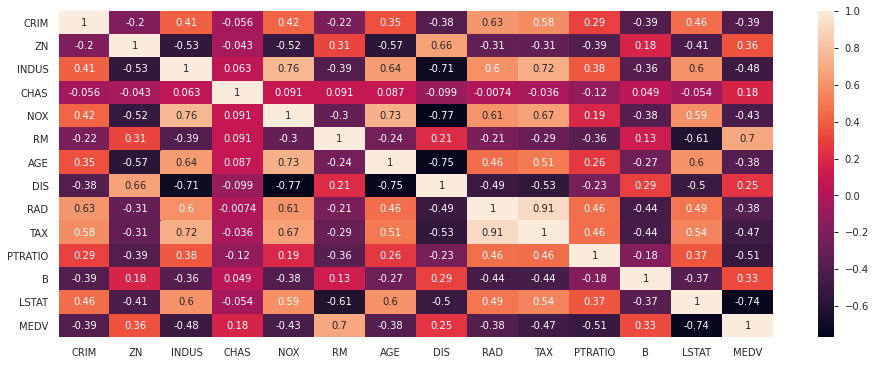

In [0]:
# Revendo novamente a correlação dos dados, mas de forma mais resumida
#Reviewing the data correlation again, but more briefly
correlacoes = data.corr()

# Usando o método heatmap do seaborn
#Using the seaborn heatmap method
plt.figure(figsize=(16, 6))
sns.heatmap(data=correlacoes, annot=True)

# Visualizando a relação entre algumas features e o alvo 
# (Observe the relation between some features and the target)

In [0]:
# Importando a biblioteca Plot.ly 
#Import Plot.ly library
import plotly.express as px

In [0]:
# RM vs MEDV (Número de quartos e valor médio do imóvel)
# RM vs MEDV (Number of rooms and average property value)
fig = px.scatter(data, x=data.RM, y=data.MEDV)
fig.show()

Observe no scatter plot acima a relação entre RM e MDEV, a relação de distribuição entre valores das colunas são inversamente proporcionais, isso é, quanto mais cresce RM menor será o valor de MDEV, e quanto maior o valor de MDEV menor será o de RM.

-------------------------------------------------------------------------------

Observe on the scatter plot about the relation between RM and MDEV, the distribution relationship between column values ​​are inversely proportional the more RM grows the lower the MDEV value, and the higher the MDEV value the lower the RM.

In [0]:
# LSTAT vs MEDV (índice de status mais baixo da população e preço do imóvel)
# LSTAT vs MEDV (lowest population status index and property price)
fig = px.scatter(data, x=data.LSTAT, y=data.MEDV)
fig.show()

Observe no scatter plot acima a relação entre LSTAT e MDEV, a relação de distribuição entre valores das colunas são inversamente proporcionais, isso é, quanto mais cresce LSTAT menor será o valor de MDEV, e quanto maior o valor de MDEV menor será o de LSTAT.

--------------------------------------------------------------------------------

Observe on the scatter plot about the relation between LSTAT and MDEV, the distribution relationship between column values ​​are inversely proportional the more LSTAT grows the lower the MDEV value, and the higher the MDEV value the lower the LSTAT .

In [0]:
# PTRATIO vs MEDV (percentual de proporção de alunos para professores)
# PTRATIO vs MEDV (percentage of student to teacher ratio)
fig = px.scatter(data, x=data.PTRATIO, y=data.MEDV)
fig.show()

Apesar de mais concentrados, as distribuições entre as colunas são de correção negativa, sendo possível observar a distribuição.

--------------------------------------------------------------------------------

Although more concentrated, the distributions between the columns are negative correction, being possible to observe the distribution.

# Analisando Outliers (Outliers analizing)

In [0]:
# Estatística descritiva de RM
# RM statistic describe
data.RM.describe()

count    506.000000
mean       6.284634
std        0.702617
min        3.561000
25%        5.885500
50%        6.208500
75%        6.623500
max        8.780000
Name: RM, dtype: float64

É possível notar inicialmenete que os dados possuem baixa variabilidade, o que indica uma próximidade dos valores ao redor do valor médio e uma distribuição normal. É possível visualizar essa distribuição no gráfico a seguir.

--------------------------------------------------------------------------------


It is possible to observe initially that the data have low variability, which indicates a proximity of the values ​​around the average value and a normal distribution. You can see this distribution in the graph below.

In [0]:
# visualizando a distribuição del RM
# RM distributive analise
import plotly.figure_factory as ff
labels = ['Distribuição de RM (número de quartos)']
fig = ff.create_distplot([data.RM], labels, bin_size=.2)
fig.show()

In [0]:
# Visualizando outliers de RM
# Preview of RM outiliers
import plotly.express as px

fig = px.box(data, y='RM')
fig.update_layout( width=800,height=800)
fig.show()


Nos gráficos gerados é possível observar os dados fora de seus padrões, ao utilizar esses dados nos algoritmos eles irão atrapalhar a eficiência, portanto é interessante retirar esses dados.

--------------------------------------------------------------------------------


In the generated graphs it is possible to observe the data out of its standards, when using this data in the algorithms they will hinder efficiency, so it is interesting to remove this data.

# Visualizando a distribuição do alvo MEDV (Viewing the target distribution MEDV)

In [0]:
# estatística de MEDV
#MEDV statistics
data.MEDV.describe()

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: MEDV, dtype: float64

In [0]:
# visualizando a distribuição de MEDV
# viewing the distribution of MEDV
import plotly.figure_factory as ff
labels = ['Distribuição de MEDV - preço médio do imóvel']
fig = ff.create_distplot([data.MEDV], labels, bin_size=.2)
fig.show()

# Analisando a simetria dos dados (Analyzing data symmetry)

In [0]:
# import do método stats da scipy
# Import "stats"
from scipy import stats

**Coeficiente de Pearson**

O coeficiente de Pearon demonstra o estado de simétria dos dados, sendo:

Valor entre -1 e 1 - distribuição simétrica.

1.   Coeficiente superior a 1 - distribuição assimétrica positiva;
2.   Coeficiente superior a -1 - distribuição assimétrica negativa;

Esse coeficiente ajuda a demonstrar a direção do surgimento de caudas assimétricas (ou longas) nos gráficos de distribuição, estando associados a outliers. O ponto de ser assimétria positiva ou negativa indica o lado da cauda.

--------------------------------------------------------------------------------

**Pearson's coefficient**

Pearon's coefficient shows the state of symmetry of the data, being:

Value between -1 and 1 - symmetrical distribution.

1. Coefficient greater than 1 - positive asymmetric distribution;
2. Coefficient greater than -1 - negative asymmetric distribution;

This coefficient helps to demonstrate the direction of the appearance of asymmetric (or long) tails in the distribution graphs, being associated with outliers. The point of being positive or negative asymmetric indicates the side of the tail.


In [0]:
# demonstra o coeficiente de pearson
# show the Pearson's coeficent
stats.skew(data.MEDV)

1.104810822864635

In [0]:
# Histogram - MEDV 
fig = px.histogram(data, x="MEDV", nbins=50, opacity=0.50)
fig.show()

Como pode ser observado no lado mais a direita do histograma, a variável alvo possui alguns dados atípicos. Estes dados podem atrapalhar o processo do algoritmo, no caso outiliers. São os 16 registros mais distante (na extrema direita do plot) que indicam um principal afastamento da média.

Diante dessa informação, é interessante observar a relação destes outliers com dados relacionados a variável alvo e as colunas mais fortemente relacionadas a ela. 

--------------------------------------------------------------------------------


With can be seen on the extreme right side of the histogram, the target variable has some atypical data. These data can hinder the algorithm process, in the case of outiliers. These are the 16 furthest records (at the far right of the plot) that indicate a major departure from the mean.

With this information, it is interesting to observe the relation of these outliers with data related to the variable target and the columns most strongly related to it.

In [0]:
# - Outliers - MEDV
import plotly.express as px

fig = px.box(data, y='MEDV')
fig.update_layout( width=800,height=800)
fig.show()

#Os pontos são os outliers
#The poins are the outliers

In [0]:
# estatistica descritiva das colunas principais 
# descriptive statistics of the main columns
data[['PTRATIO','LSTAT','RM', 'MEDV']].describe()

,PTRATIO,LSTAT,RM,MEDV
count,506.000000,506.000000,506.000000,506.000000
mean,18.455534,12.653063,6.284634,22.532806
std,2.164946,7.141062,0.702617,9.197104
min,12.600000,1.730000,3.561000,5.000000
25%,17.400000,6.950000,5.885500,17.025000
50%,19.050000,11.360000,6.208500,21.200000
75%,20.200000,16.955000,6.623500,25.000000
max,22.000000,37.970000,8.780000,50.000000


Uma dedução inicial sobre os dados outliers e as colunas destacadas é que são dados gerados de forma atípica. Visto que as colunas descrevem uma relação do preço do imóvel com a taca de alunos e professores da região e número médio de quartos nas casas. Portanto, é interessante retirar os 16 dados indicados no histograma de MEDV, que são dados com valores elevados, e observar a nova associação de dados. 

--------------------------------------------------------------------------------

An initial insight about outliers data and highlighted columns is that they are data generated in an atypical way. Since the columns describe a relation between the price of the property and the rate of students and teachers in the region and the average number of rooms in the houses. Therefore, it is interesting to remove the 16 data indicated in the MEDV histogram, which are data with high values, and to observe the new data association.

In [0]:
# imprimindo os 16 maiores valores de MEDV
data[['RM','LSTAT','PTRATIO','MEDV']].nlargest(16, 'MEDV')

,RM,LSTAT,PTRATIO,MEDV
161,7.489,1.73,14.7,50.0
162,7.802,1.92,14.7,50.0
163,8.375,3.32,14.7,50.0
166,7.929,3.70,14.7,50.0
186,7.831,4.45,17.8,50.0
195,7.875,2.97,14.4,50.0
204,8.034,2.88,14.7,50.0
225,8.725,4.63,17.4,50.0
257,8.704,5.12,13.0,50.0
267,8.297,7.44,13.0,50.0


É possível observar uma informação estranha, o que pode indicar esses valores muito fora do padrão. A primeira ideia seria a observação que os dados estão com registros com variações acima do desvio padrão de seus registros. Uma situação a imaginar seria de um imóvel muito caro com muitos quartos em uma região de poder aquisitivo mais baixo, o que seria incomum. 

In [0]:
# Para filtrar os 16 maiores registros da coluna MEDV serão pegos os índices desses registros no dataframe
# To filter the 16 largest records in the MEDV column, the indexes of these records will be taken from the dataframe
top16 = data.nlargest(16, 'MEDV').index

In [0]:
# remove os valores listados em top16
# removes the values ​​listed in top16

data.drop(top16, inplace=True)

In [0]:
# visualizando a distribuição de MEDV
# viewing a MEDV distribution
import plotly.figure_factory as ff
labels = ['Distribuição da variável MEDV (número de quartos)']
fig = ff.create_distplot([data.MEDV], labels, bin_size=.2)
fig.show()

In [0]:
# Histogram -  MEDV 
fig = px.histogram(data, x="MEDV", nbins=50, opacity=0.50)
fig.show()

In [0]:
# imprime o coeficiente de pearson
# print the Pearson's coeficient
stats.skew(data.MEDV)

0.7732836030909053

Apesar da indicação de uma cauda ainda longa, os efeitos de outliers já foram amenizados, o que indica que os algoritmos podem indicar valores mais precisos sem a influência dos mesmos. Os 16 registros atípicos demonstram uma relação estranha entre os dados, mas com sua remoção o coeficiente de Pearson diminuiu de aproximadamente 1.1048 para 0.7733, indicando uma diminuição da assimétria dos dados.

Agora com um ajuste inicial nos dados é possível seguir para definir qual algoritmo será utilizado para predizer o valor de um imóvel de acordo com os dados. 

Como ponto de partida será gerado um modelo padrão que servirá de base para analisar a eficiência do algoritmo a ser escolhido. Apesar dos dados de MEDV indicarem uma escolha de dados de regressão, será utilizado todos os algoritmos de machine learning para observar seus  resultados.

--------------------------------------------------------------------------------

Despite the indication of a long tail yet, the effects of outliers have already been mitigated, which indicates that the algorithms can indicate more precise values ​​without their influence. The 16 atypical records show a strange relationship between the data, but with their removal the Pearson's coefficient decreased from approximately 1.1048 to 0.7733, indicating a decrease in the data asymmetry.

Now with an initial adjustment in the data it is possible to follow to defining which algorithm will be used to predict the value of a property according to the data.

With a starting point, a standard model will be generated that will serve as a basis to analyze the efficiency of the algorithm to be chosen. Although the MEDV data indicate a choice of regression data, all machine learning algorithms will be used to observe their results.

**Definindo um Baseline (Define a Baseline)**

- Uma baseline define uma intuição inicial para o projeto, onde descreve de forma fácil o foco de encontrar melhoras na aplicação;

- Para uma melhor definição da baseline será ajustado o valor de RM e será categorizado com quantidade de quartos. RM tem um formato float, portanto será transformado em int, o que daria uma perspectiva de arredondamento para baixo e depois considerar de a quantidade de quartos é pequena média ou grande. Com essa definição, será atribuído um valor médio de venda para essa quantidade de quartos e este valor será o preço previsto para baseline para aquele registro;

- Posteriormente esse valor previsto do registro na baseline será utilizado como referência para comparar o valor do algoritmo com o valor real e o da baseline, para servir de intuição se o algoritmo esta predizendo adequdamente os dados.

--------------------------------------------------------------------------------

- A baseline defines an initial insight for the project, where it easily describes the focus of finding improvements in the application;

- To a better definition of the baseline, the RM value will be adjusted and will be categorized with the number of rooms. RM is a float type, so it will be transformed in a int type, which would give a perspective of rounding down and then consider whether the number of rooms is small, medium or large. With this definition, an average sales value will be assigned for this number of rooms and this value will be the estimated baseline price for that registration;

- Subsequently, this predicted value of the baseline record will be used as a reference to compare the value of the algorithm with the real value and that of the baseline, to serve as an intuition if the algorithm is adequately predicting the data.

In [0]:
# converte os dados de RM em int
# Convert RM registers to a int type

data.RM = data.RM.astype(int)

In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 490 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     490 non-null    float64
 1   ZN       490 non-null    float64
 2   INDUS    490 non-null    float64
 3   CHAS     490 non-null    float64
 4   NOX      490 non-null    float64
 5   RM       490 non-null    int64  
 6   AGE      490 non-null    float64
 7   DIS      490 non-null    float64
 8   RAD      490 non-null    float64
 9   TAX      490 non-null    float64
 10  PTRATIO  490 non-null    float64
 11  B        490 non-null    float64
 12  LSTAT    490 non-null    float64
 13  MEDV     490 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 57.4 KB


In [0]:
# estatística descritiva da coluna numero de quartos
# descriptive statistics of the column  with the number of rooms
data.RM.describe()

count    490.000000
mean       5.740816
std        0.737657
min        3.000000
25%        5.000000
50%        6.000000
75%        6.000000
max        8.000000
Name: RM, dtype: float64

In [0]:
# definindo a regra para categorizar os dados
# Define Dictionary to  recive the categorys of rooms
categorias = []

In [0]:
# alimenta a lista categorias
for i in data.RM.iteritems():
  valor = (i[1])
  if valor <= 4:
    categorias.append('Pequeno') #small
  elif valor < 7:
    categorias.append('Medio') #medium
  else:
    categorias.append('Grande') #large

In [0]:
# cria a coluna categorias
# Creat Category column
data['categorias'] = categorias

In [0]:
# imprime a contagem de categorias
# print the number of rooms of the each category
data.categorias.value_counts()

Medio      424
Grande      52
Pequeno     14
Name: categorias, dtype: int64

In [0]:
# agrupa as categorias e calcula as médias
# groups categories and calculates averages
medias_categorias = data.groupby(by='categorias')['MEDV'].mean()

In [0]:
# visualizando a variável medias_categorias
# print the variable 
medias_categorias  #(categorys means)

categorias
Grande     35.719231
Medio      20.130425
Pequeno    14.921429
Name: MEDV, dtype: float64

In [0]:
# criando o dicionario com chaves medio, grande e pequeno e seus valores
# creating the dictionary with medium, large and small keys and their values
dic_baseline = {'Grande': medias_categorias[0], 'Medio': medias_categorias[1], 'Pequeno': medias_categorias[2]}

In [0]:
# imprime dicionario
#print dictionary
dic_baseline

{'Grande': 35.71923076923077,
 'Medio': 20.1304245283019,
 'Pequeno': 14.921428571428574}

In [0]:
# cria a função retorna baseline
# creates the function returns baseline
def retorna_baseline(num_quartos):
  if num_quartos <= 4:
    return dic_baseline.get('Pequeno')
  elif num_quartos < 7:
    return dic_baseline.get('Medio')
  else:
    return dic_baseline.get('Grande')

In [0]:
# apresenta um exemplo de uso da função
# print a example of function
retorna_baseline(7)

35.71923076923077

In [0]:
# Demonstrando a associação do registro com o valor médio associado a este
# Demonstrating the association of the record with the average value associated with it
for i in data.RM.iteritems():
  n_quartos = i[1]
  print('Número de quartos é: {} , Valor médio: {}'.format(n_quartos,retorna_baseline(n_quartos)))

Número de quartos é: 6 , Valor médio: 20.1304245283019
Número de quartos é: 6 , Valor médio: 20.1304245283019
Número de quartos é: 7 , Valor médio: 35.71923076923077
Número de quartos é: 6 , Valor médio: 20.1304245283019
Número de quartos é: 7 , Valor médio: 35.71923076923077
Número de quartos é: 6 , Valor médio: 20.1304245283019
Número de quartos é: 6 , Valor médio: 20.1304245283019
Número de quartos é: 6 , Valor médio: 20.1304245283019
Número de quartos é: 5 , Valor médio: 20.1304245283019
Número de quartos é: 6 , Valor médio: 20.1304245283019
Número de quartos é: 6 , Valor médio: 20.1304245283019
Número de quartos é: 6 , Valor médio: 20.1304245283019
Número de quartos é: 5 , Valor médio: 20.1304245283019
Número de quartos é: 5 , Valor médio: 20.1304245283019
Número de quartos é: 6 , Valor médio: 20.1304245283019
Número de quartos é: 5 , Valor médio: 20.1304245283019
Número de quartos é: 5 , Valor médio: 20.1304245283019
Número de quartos é: 5 , Valor médio: 20.1304245283019
Número d

In [0]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,categorias
0,0.00632,18.0,2.31,0.0,0.538,6,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,Medio
1,0.02731,0.0,7.07,0.0,0.469,6,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,Medio
2,0.02729,0.0,7.07,0.0,0.469,7,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,Grande
3,0.03237,0.0,2.18,0.0,0.458,6,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,Medio
4,0.06905,0.0,2.18,0.0,0.458,7,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,Grande


### Trabalhando com a baseline (Work with the baseline)

Primeiramente iremos retirar as colunas que não são interessantes para o estudo, estes são as colunas com correlação fraca em relação a nossa coluna alvo, como previamente vimos. 

--------------------------------------------------------------------------------

First, we will remove the columns that are not interesting for the study, these are the columns with weak correlation in relation to our target column, as previously seen.

In [0]:
# remove as colunas colineares, variavel alvo e a coluna categorias, o restante é associado a X
# removes the collinear columns, target variable and the categories column, the rest is associated to X
X = data.drop(['RAD','TAX','MEDV','DIS','AGE','ZN','categorias'], axis=1)

In [0]:
# y será então nosso alvo
# y will be our variable target
y = data['MEDV']

In [0]:
X.head()

,CRIM,INDUS,CHAS,NOX,RM,PTRATIO,B,LSTAT
0,0.00632,2.31,0.0,0.538,6,15.3,396.90,4.98
1,0.02731,7.07,0.0,0.469,6,17.8,396.90,9.14
2,0.02729,7.07,0.0,0.469,7,17.8,392.83,4.03
3,0.03237,2.18,0.0,0.458,6,18.7,394.63,2.94
4,0.06905,2.18,0.0,0.458,7,18.7,396.90,5.33


In [0]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64

Para geração dos modelos, serão gerados uma base de dados para treinamento dos modelos de machine learning e um grupo base de teste. Esses novos grupos serão os mesmos a ser utilizados em todos os modelos a serem estudados.

Para essa tarefa será utilizado o método existente no Scikit Learn.

--------------------------------------------------------------------------------

To generate the models, a database will be generated for training the machine learning models and a base test group. These new groups will be the same to be used in all models to be studied.

To this task, will be use the existing method in Scikit Learn.

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
# divide os dados entre o conjunto de treino e teste, 80% e 20% respectivamente, é interessante trocar esses  valores para novos testes e ver os resultados.
# define qualquer valor para o parâmetro random_state.

# divide the data between the training and test set, 80% and 20% respectively, it is interesting to exchange these values ​​for new tests and see the results.
# defines any value for the random_state parameter.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=5)

In [0]:
# imprime a quantidade de linhas dos conjuntos
# print the number os lines in groups
print ('X_train: numero de linhas e colunas: {}'.format(X_train.shape))
print ('X_test: numero de linhas e colunas: {}'.format(X_test.shape))
print ('y_train: numero de linhas e colunas: {}'.format(y_train.shape))
print ('y_test: numero de linhas e colunas: {}'.format(y_test.shape))

X_train: numero de linhas e colunas: (392, 8)
X_test: numero de linhas e colunas: (98, 8)
y_train: numero de linhas e colunas: (392,)
y_test: numero de linhas e colunas: (98,)


Modelo de baseline (Baseline model)

In [0]:
X_test.head()

,CRIM,INDUS,CHAS,NOX,RM,PTRATIO,B,LSTAT
245,0.19133,5.86,0.0,0.431,5,19.1,389.13,18.46
456,4.66883,18.10,0.0,0.713,5,20.2,10.48,19.01
75,0.09512,12.83,0.0,0.437,6,18.7,383.23,8.94
238,0.08244,4.93,0.0,0.428,6,16.6,379.41,6.36
362,3.67822,18.10,0.0,0.770,5,20.2,380.79,10.19


In [0]:
# definindo uma lista de predicoes
# define a list to predicoes (prediction) variable
predicoes = []

In [0]:
# para cada elemento do teste alimenta a lista predicoes
# to each element of test will feed the list
for i in X_test.RM.iteritems():
  n_quartos = i[1]
  predicoes.append(retorna_baseline(n_quartos))

In [0]:
# imprime as 10 primeiras linhas da lista de predicoes
#print the 10 first registers of the list
predicoes[:10]

[20.1304245283019,
 20.1304245283019,
 20.1304245283019,
 20.1304245283019,
 20.1304245283019,
 20.1304245283019,
 20.1304245283019,
 20.1304245283019,
 35.71923076923077,
 35.71923076923077]

Atribuindo resultados a um dataframe para comparar posteriormente os resultados. 

--------------------------------------------------------------------------------

Assigning results to a dataframe to compare the results later.



In [0]:
# cria um dataframe vazio
# Creat a empity dataframe
df_results = pd.DataFrame()

In [0]:
# adiciona a coluna valor_real
# add the actual_value column
df_results['valor_real'] = y_test.values

In [0]:
# cria a coluna valor_predito_baseline com as predicoes
# creat the column baseline_value with predictions
df_results['valor_predito_baseline'] = predicoes

In [0]:
df_results.head(10)

,valor_real,valor_predito_baseline
0,18.5,20.130425
1,12.7,20.130425
2,21.4,20.130425
3,23.7,20.130425
4,20.8,20.130425
5,25.0,20.130425
6,9.7,20.130425
7,14.9,20.130425
8,34.9,35.719231
9,31.6,35.719231


Plota o valor real e o baseline (plot the real value and baseline value)

In [0]:
import plotly.graph_objects as go

# Create traces
fig = go.Figure()

# Linha com os dados de teste
fig.add_trace(go.Scatter(x=df_results.index,
                         y=df_results.valor_real,
                         mode='lines+markers',
                         name='Valor Real'))

# Linha com os dados preditos
fig.add_trace(go.Scatter(x=df_results.index,
                         y=df_results.valor_predito_baseline,
                         mode='lines+markers',
                         name='Valor Predito Baseline'))
# Plota a figura
fig.show()

Avaliação do modelo baseline (Avaliate the baseline model)

In [0]:
# Será utilizado a métrica RMSE para avaliar a efetividade da predição 
# The RMSE metric will be used to assess the effectiveness of the prediction
from sklearn.metrics import mean_squared_error
from math import sqrt

In [0]:
rmse = (np.sqrt(mean_squared_error(y_test, predicoes)))

In [0]:
# imprime a performance do modelo
# print the performace
print ('Performance do modelo baseline:')
print('\nRMSE é: {} '.format(rmse))

Performance do modelo baseline:

RMSE é: 6.205816494411828 


### Machine Learning

Nessa etapa serão aplicados os dados de treino e teste a cada modelo de machine learning e comparados os resultados. 

--------------------------------------------------------------------------------


In this stage, training and test data will be applied to each machine learning model and the results will be compared.

#### Regressão Linear (Linear Regression)

Este modelo é interessante devido ao formato dos dados e suas correlações permitirem o uso de regressão linear. Este método é simples e eficiente para este tipo de aplicação, demonstrando soluções rápidas e robustas. 

--------------------------------------------------------------------------------

This model is interesting due to the data format and its correlations allow the use of linear regression. This method is simple and efficient for this type of application, demonstrating fast and robust solutions.

In [0]:
from sklearn.linear_model import LinearRegression

In [0]:
# cria o objeto do tipo LinearRegression
# creat a LinearRegression object 
lin_model = LinearRegression()

In [0]:
# treina o algoritmo de regressão linear
# train the algorithm
lin_model.fit(X_test, y_test)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
# avaliação do modelo nos dados de teste
# avaliate the model
y_pred = lin_model.predict(X_test)

In [0]:
# calcula a métrica rmse
# Calculate the RMSE metric
rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))

In [0]:
# imprime o desempenho do modelo
#print the performance
print ('Performance do modelo avaliado com os dados de teste:')
print('\nRMSE é: {} '.format(rmse))

Performance do modelo avaliado com os dados de teste:

RMSE é: 4.075787846250408 


In [0]:
# atribui os resultados no dataframe df_results
# associate the results on the dataframe results
df_results['valor_predito_reg_linear'] = lin_model.predict(X_test)

In [0]:
df_results.head(10)

,valor_real,valor_predito_baseline,valor_predito_reg_linear
0,18.5,20.130425,14.652912
1,12.7,20.130425,10.385537
2,21.4,20.130425,25.255123
3,23.7,20.130425,28.064158
4,20.8,20.130425,16.610585
5,25.0,20.130425,22.150708
6,9.7,20.130425,9.259504
7,14.9,20.130425,15.010778
8,34.9,35.719231,32.682589
9,31.6,35.719231,30.864620


In [0]:
#plot de resultados
#Plot the results

#Dica: click na legenda de um dos modelos do plot para desativa-lo e observar apenas os dados que deseja. 
#Tip: click on the legend of one of the models in the plot to deactivate it and observe only the data you want.

import plotly.graph_objects as go

# Create traces
fig = go.Figure()

# Linha com os dados de teste
fig.add_trace(go.Scatter(x=df_results.index,
                         y=df_results.valor_real,
                         mode='lines+markers',
                         name='Valor Real'))

# Linha com os dados de baseline
fig.add_trace(go.Scatter(x=df_results.index,
                         y=df_results.valor_predito_baseline,
                         mode='lines+markers',
                         name='Baseline'))

# Linha com os dados preditos pela regressão linear
fig.add_trace(go.Scatter(x=df_results.index,
                         y=df_results.valor_predito_reg_linear,
                         mode='lines',
                         line = dict(color = '#FEBFB3'),
                         name='Regressão Linear'))

# Plota a figura
fig.show()

#Dica: click na legenda de um dos modelos do plot para desativa-lo e observar apenas os dados que deseja. 
#Tip: click on the legend of one of the models in the plot to deactivate it and observe only the data you want.

Observe que o modelo de regressão linear melhorou na média o resultado das previsões em relação a baseline.

--------------------------------------------------------------------------------


Note that the linear regression model improved on average the result of the predictions in relation to the baseline.

##### Arvore de decisão (Decision Tree)

Este algoritmo de aprendizado supervisionado apresenta resultados bons para casos de regressão, sendo de fácil aplicação.

--------------------------------------------------------------------------------

This supervised learning algorithm presents good results for regression cases, being easy to apply.


In [0]:

from sklearn.tree import DecisionTreeRegressor

In [0]:
# cria um objeto do tipo DecisionTreeRegressor
#creat a DecisionTreeRegressor type
regressor = DecisionTreeRegressor()

In [0]:
# treina o algoritmo
#Train a algorithm
regressor.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

Avaliando o modelo de Árvore de Decisão (Evaluating the Decision Tree model)

In [0]:
# avaliação do modelo nos dados de teste
# avaliate the model
y_pred = regressor.predict(X_test)

In [0]:
# atribui os resultados no dataframe df_results
# associate the results on the dataframe results
df_results['valor_predito_arvore'] = y_pred

In [0]:
df_results.head(10)

,valor_real,valor_predito_baseline,valor_predito_reg_linear,valor_predito_arvore
0,18.5,20.130425,14.652912,17.8
1,12.7,20.130425,10.385537,23.2
2,21.4,20.130425,25.255123,24.5
3,23.7,20.130425,28.064158,24.3
4,20.8,20.130425,16.610585,21.8
5,25.0,20.130425,22.150708,27.5
6,9.7,20.130425,9.259504,7.2
7,14.9,20.130425,15.010778,17.8
8,34.9,35.719231,32.682589,42.3
9,31.6,35.719231,30.864620,31.7


In [0]:
#plot de resultados
#Plot the results

import plotly.graph_objects as go

# cria uma figura
fig = go.Figure()

# Linha com os dados de teste
fig.add_trace(go.Scatter(x=df_results.index,
                         y=df_results.valor_real,
                         mode='lines+markers',
                         name='Valor Real'))

# Linha com os dados de teste
fig.add_trace(go.Scatter(x=df_results.index,
                         y=df_results.valor_predito_baseline,
                         mode='lines+markers',
                         name='Baseline'))


# Linha com os dados de teste
fig.add_trace(go.Scatter(x=df_results.index,
                         y=df_results.valor_predito_reg_linear,
                         mode='lines+markers',
                         name='Regressão Linear'))

# Linha com os dados preditos
fig.add_trace(go.Scatter(x=df_results.index,
                         y=df_results.valor_predito_arvore,
                         mode='lines+markers',
                         name='Arvore'))
# Plota a figura
fig.show()

Avaliação do Modelo

In [0]:
# imprime o desempenho do modelo
#print the performance
rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))

In [0]:
# imprime o desempenho do modelo
# print the performance of the model
print ('Performance do modelo avaliado com os dados de teste:')
print('\nRMSE é: {} '.format(rmse))

Performance do modelo avaliado com os dados de teste:

RMSE é: 5.270092745960018 


O modelo de Arvore de decisão demonstrou um resultado melhor na média que a baseline, entretanto os resultados não foram bons como o modelo de regressão linear.

--------------------------------------------------------------------------------

The decision tree model showed a better result on average than the baseline, however the results were not as good as the linear regression model.

#### Random Forest

Este método é mais robusto que o método de arvore de decisão, entretando é mais lento. O algortimo  Random Forest possui vários métodos de execução, mas será aplicado inicialmente  o método ensemble, portanto é interessante mudar os parâmetros para verificar a mudança de resultados.

--------------------------------------------------------------------------------

This method is more robust than the decision tree method, however it is slower. The Random Forest algorithm has several execution methods, but the ensemble method will be applied initially, so it is interesting to change the parameters to verify the change in results.

**Parâmetros da Random Forest**

- O parâmetro **n_estimators** define a quantidade de árvores que serão usadas para criação dos modelos e quanto mais árvores, mais modelos no ensemble;

- O parâmtro **max_deph** define a profundidade da árvore e quanto mais profunda a árvore mais especializada serão os dados de treino o nosso modelo;

- O parâmetro **max_features** define a quantidade máxima de nós que separam os níveis "folha" da árvore.

-------------------------------------------------------------------------------

- The **n_estimators** parameter defines the number of trees that will be used to create the models and the more trees, the more models in the ensemble;

- The **max_deph** parameter defines the depth of the tree and the deeper the tree, the more specialized the training data will be in our model;

- The **max_features** parameter defines the maximum number of nodes that separate the "leaf" levels of the tree.


In [0]:
from sklearn.ensemble import RandomForestRegressor

In [0]:
# cria o objeto rf_regressor
#creat the rf_regressor object
rf_regressor = RandomForestRegressor()

In [0]:
# treina o algoritmo
#train the algorithm
rf_regressor.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [0]:
# avaliação do modelo nos dados de teste
# avaliate the model
y_pred = rf_regressor.predict(X_test)

In [0]:
# atribui os resultados no dataframe df_results
# associate the results on the dataframe results
df_results['valor_predito_random_forest'] = rf_regressor.predict(X_test)

In [0]:
# imprime o desempenho do modelo
#print the performance
rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))

In [0]:
# imprime o desempenho do modelo
# print the performance of the model
print ('Performance do modelo avaliado com os dados de teste:')
print('\nRMSE é: {} '.format(rmse))

Performance do modelo avaliado com os dados de teste:

RMSE é: 3.313453573182012 


In [0]:
#plot de resultados
#Plot the results
import plotly.graph_objects as go

# Create traces
fig = go.Figure()

# Linha com os dados de teste
fig.add_trace(go.Scatter(x=df_results.index,
                         y=df_results.valor_real,
                         mode='markers',
                         name='Valor Real'))

# Linha com os dados da baseline
fig.add_trace(go.Scatter(x=df_results.index,
                         y=df_results.valor_predito_baseline,
                         mode='lines+markers',
                         line = dict(color = '#FF00FF'),
                         name='Baseline'))

# Linha com os dados preditos pela arvore
fig.add_trace(go.Scatter(x=df_results.index,
                         y=df_results.valor_predito_arvore,
                         mode='lines',
                         line = dict(color = '#B2FF66'),
                         name='Árvore'))

# Linha com os dados preditos pela regressão linear
fig.add_trace(go.Scatter(x=df_results.index,
                         y=df_results.valor_predito_reg_linear,
                         mode='lines',
                         line = dict(color = '#17BECF'),
                         name='Regressão Linear'))


# Linha com os dados preditos pela Random Forest
fig.add_trace(go.Scatter(x=df_results.index,
                         y=df_results.valor_predito_random_forest,
                         mode='lines',
                         line = dict(color = '#7F7F7F'),
                         name='Random Forest'))

# Plota a figura
fig.show()

Como pode ser observado, o método Random Forest apresentou um melhor resultado em relação aos demais, se aproximando bastante na média dos valores reais.

--------------------------------------------------------------------------------

With can be seen, the Random Forest method presented a better result in relation to the others, getting very close to the average of the real values.

### ***Conferindo outros algoritmos (Checking other algorithms) ***

Os modelos a seguir são normalmente aplicados a classificação, onde provavelmente apresentarão  resultados inferiores aos modelos já aplicados. Entretanto serão aplicados ainda assim para observar os resultados. Alguns ajustes na base de teste serão feitos para que os modelos sejam possíveis de ser aplicados.

--------------------------------------------------------------------------------


The following models are usually applied to classification, where they are likely to present inferior results to the models already applied. However, they will still be applied to observe the results. Some adjustments to the test base will be made so that the models are possible to be applied



# SVM

Esse algoritmo fornece resultados interessantes quanto a aplicação de classificação em tarefas bem complexas. Esse método utiliza de hiperplanos para classificar os dados com separação com margem máxima.  

In [0]:
from sklearn.svm import SVC

# cria o objeto SVM
#creat the SVM object
classificadorsvm = SVC(kernel = 'rbf', random_state = 1, C = 2.0)

#aqui e nos demais métodos será necessário uma modificação no y, o modelo atua com uso de valores int, portanto valores float não serão classificados,
#assim sendo necessário mudar o tipo da variável.
#in this and in the others methods a modification in y will be necessary, the model acts using int values, therefore float values ​​will not be classified,
#so it is necessary to change the type of the variable.
classificadorsvm.fit(X_train, y_train.astype(int))





SVC(C=2.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=1, shrinking=True, tol=0.001,
    verbose=False)

In [0]:

# avaliação do modelo nos dados de teste
# avaliate the model
y_pred = classificadorsvm.predict(X_test)

# atribui os resultados no dataframe df_results
# associate the results on the dataframe results
df_results['valor_predito_SVM'] = classificadorsvm.predict(X_test)


In [0]:
# imprime o desempenho do modelo
# print the performance of the model
rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))
import collections
collections.Counter(y_test)

Counter({5.0: 1,
         7.0: 1,
         7.4: 1,
         8.5: 1,
         9.6: 1,
         9.7: 1,
         10.4: 1,
         10.8: 1,
         11.0: 1,
         11.5: 1,
         12.7: 1,
         13.1: 2,
         13.5: 1,
         13.6: 1,
         14.0: 1,
         14.2: 1,
         14.9: 1,
         15.0: 1,
         15.2: 1,
         15.4: 1,
         16.1: 2,
         16.5: 1,
         16.7: 1,
         17.2: 1,
         17.3: 1,
         17.5: 1,
         17.6: 1,
         18.2: 1,
         18.4: 1,
         18.5: 2,
         18.7: 1,
         19.0: 1,
         19.1: 1,
         19.2: 1,
         19.3: 1,
         19.4: 2,
         19.6: 3,
         19.7: 1,
         19.8: 1,
         19.9: 1,
         20.3: 1,
         20.4: 1,
         20.5: 1,
         20.8: 1,
         21.2: 1,
         21.4: 2,
         21.5: 1,
         21.6: 1,
         21.7: 3,
         22.2: 2,
         22.4: 1,
         22.6: 4,
         22.9: 1,
         23.0: 1,
         23.1: 1,
         23.7: 1

In [0]:
# imprime o desempenho do modelo
# print the performance of the model
print ('Performance do modelo avaliado com os dados de teste:')
print('\nRMSE é: {} '.format(rmse))

Performance do modelo avaliado com os dados de teste:

RMSE é: 8.148625776216276 


In [0]:
#plot de resultados
#Plot the results
import plotly.graph_objects as go

# Create traces
fig = go.Figure()

# Linha com os dados de teste
fig.add_trace(go.Scatter(x=df_results.index,
                         y=df_results.valor_real,
                         mode='markers',
                         name='Valor Real'))

# Linha com os dados da baseline
fig.add_trace(go.Scatter(x=df_results.index,
                         y=df_results.valor_predito_baseline,
                         mode='lines+markers',
                         line = dict(color = '#FF00FF'),
                         name='Baseline'))

# Linha com os dados preditos pela arvore
fig.add_trace(go.Scatter(x=df_results.index,
                         y=df_results.valor_predito_arvore,
                         mode='lines',
                         line = dict(color = '#B2FF66'),
                         name=' Árvore'))

# Linha com os dados preditos pela regressão linear
fig.add_trace(go.Scatter(x=df_results.index,
                         y=df_results.valor_predito_reg_linear,
                         mode='lines',
                         line = dict(color = '#17BECF'),
                         name='Regressão Linear'))


# Linha com os dados preditos pela Random Forest
fig.add_trace(go.Scatter(x=df_results.index,
                         y=df_results.valor_predito_random_forest,
                         mode='lines',
                         line = dict(color = '#7F7F7F'),
                         name='Random Forest'))

# Linha com os dados preditos pela SVM
fig.add_trace(go.Scatter(x=df_results.index,
                         y=df_results.valor_predito_SVM,
                         mode='lines',
                         line = dict(color = '#7F7F7F'),
                         name='SVM'))

# Plota a figura
fig.show()

O método SVM não se mostrou adequado para aplicação de regressão, ao menos nesse exemplo, apresentando um desempenho inferior aos métodos anteriores e a baseline.

--------------------------------------------------------------------------------

The SVM method was not suitable for the application of regression, in this example the method presenting lower performance than the previous methods and a baseline.

# KNN

Este é um algoritmo baseado em instâncias que visa encontrar um grupo para associar um certo dado. O dataset é dividido em grupos de dados e uma dada nova informação será comparada aos dados de cada dados de cada grupo, onde o novo dado será associado ao grupo com maior quantidade de membros do grupo mais próximos do novo dado. Este método é interessante para classificar um registro.


Definindo parâmetros:

*   n_neighbors é o número de vizinhos mais próximos a serem utilizados para agrupar a nova informação, não se procura o elemento mais próximo mas sim os 5 mais próximos para definir o agrupamento;
*   metric é o parâmetro que define a metrica de distância especial entre vetores, no caso será utilizado o método Minkowski;
*   p é um parâmetro para o método Minkowski que define o calculo da distância como sendo euclidiano.

--------------------------------------------------------------------------------

Defining parameters:

* n_neighbors is the number of closest neighbors to be used to group the new information, not looking for the closest element but looking for the 5 closest to define the grouping;
* metric is the parameter that defines the special distance metrics between vectors, in which case the Minkowski method will be used;
* p is a parameter for the Minkowski method that defines the distance calculation as being Euclidean.

In [0]:

from sklearn.neighbors import KNeighborsClassifier


# cria o objeto KNN
#creat the KNN object
classificadorknn = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p = 2)
classificadorknn.fit(X_train, y_train.astype(int))
y_pred = classificadorknn.predict(X_test)


In [0]:
# avaliação do modelo nos dados de teste
# avaliate the model
y_pred = classificadorknn.predict(X_test)

# atribui os resultados no dataframe df_results
# associate the results on the dataframe results
df_results['valor_predito_KNN'] = classificadorknn.predict(X_test)

In [0]:
# imprime o desempenho do modelo
#print the performance
rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))
import collections
collections.Counter(y_test)

Counter({5.0: 1,
         7.0: 1,
         7.4: 1,
         8.5: 1,
         9.6: 1,
         9.7: 1,
         10.4: 1,
         10.8: 1,
         11.0: 1,
         11.5: 1,
         12.7: 1,
         13.1: 2,
         13.5: 1,
         13.6: 1,
         14.0: 1,
         14.2: 1,
         14.9: 1,
         15.0: 1,
         15.2: 1,
         15.4: 1,
         16.1: 2,
         16.5: 1,
         16.7: 1,
         17.2: 1,
         17.3: 1,
         17.5: 1,
         17.6: 1,
         18.2: 1,
         18.4: 1,
         18.5: 2,
         18.7: 1,
         19.0: 1,
         19.1: 1,
         19.2: 1,
         19.3: 1,
         19.4: 2,
         19.6: 3,
         19.7: 1,
         19.8: 1,
         19.9: 1,
         20.3: 1,
         20.4: 1,
         20.5: 1,
         20.8: 1,
         21.2: 1,
         21.4: 2,
         21.5: 1,
         21.6: 1,
         21.7: 3,
         22.2: 2,
         22.4: 1,
         22.6: 4,
         22.9: 1,
         23.0: 1,
         23.1: 1,
         23.7: 1

In [0]:
# imprime o desempenho do modelo
# print the performance of the model
print ('Performance do modelo avaliado com os dados de teste:')
print('\nRMSE é: {} '.format(rmse))

Performance do modelo avaliado com os dados de teste:

RMSE é: 5.86115716094579 


In [0]:
#plot de resultados
#Plot the results
import plotly.graph_objects as go

# Create traces
fig = go.Figure()

# Linha com os dados de teste
fig.add_trace(go.Scatter(x=df_results.index,
                         y=df_results.valor_real,
                         mode='markers',
                         name='Valor Real'))

# Linha com os dados da baseline
fig.add_trace(go.Scatter(x=df_results.index,
                         y=df_results.valor_predito_baseline,
                         mode='lines+markers',
                         line = dict(color = '#FF00FF'),
                         name='Baseline'))

# Linha com os dados preditos pela arvore
fig.add_trace(go.Scatter(x=df_results.index,
                         y=df_results.valor_predito_arvore,
                         mode='lines',
                         line = dict(color = '#B2FF66'),
                         name=' Árvore'))

# Linha com os dados preditos pela regressão linear
fig.add_trace(go.Scatter(x=df_results.index,
                         y=df_results.valor_predito_reg_linear,
                         mode='lines',
                         line = dict(color = '#17BECF'),
                         name=' Regressão Linear'))


# Linha com os dados preditos pela Random Forest
fig.add_trace(go.Scatter(x=df_results.index,
                         y=df_results.valor_predito_random_forest,
                         mode='lines',
                         line = dict(color = '#7F7F7F'),
                         name='Random Forest'))

# Linha com os dados preditos pela SVM
fig.add_trace(go.Scatter(x=df_results.index,
                         y=df_results.valor_predito_SVM,
                         mode='lines',
                         line = dict(color = '#7F7F50'),
                         name='SVM'))

# Linha com os dados preditos pela SVM
fig.add_trace(go.Scatter(x=df_results.index,
                         y=df_results.valor_predito_KNN,
                         mode='lines',
                         line = dict(color = '#7F557F'),
                         name='KNN'))

# Plota a figura
fig.show()

Podemos observar que o método KNN apresentou resultados melhores na média que o baseline e o SVM, entretanto não apresentou resultados não tão bons como os modelos de regressão apresentados anteriormente.

--------------------------------------------------------------------------------

We can observe that the KNN method presented better results in the average than the baseline and the SVM, however it did not present results not as good as the regression models previously presented.

# Redes Neurais

Redes neurais artificiais são modelos computacionais inspirados pelo sistema nervoso central de um animal que são capazes de realizar o aprendizado de máquina bem como o reconhecimento de padrões. 

--------------------------------------------------------------------------------

Artificial neural networks are computational models inspired by an animal's central nervous system that are capable of machine learning as well as pattern recognition.

Definindo os parâmetros:



*   Verbose é o parâmetro para indicar o processo de print de operações.
*   max_iter indica o número máximo de interações da ree neural;
*   tol define a tolerância de otimização, onde durante o treinamento os dados serão ajustados para noso dados até que o valor de tol seja superado;
*   solver define o peso de otimização, 'adam' se refere ao método de ótimização estocastica  proposto por Kingma, Diederik, and Jimmy Ba;
*   hidden_layer_sizes define o número de neuronios na camada oculta;
*   activation define a função de ativação por função logistica sigmoidal;

--------------------------------------------------------------------------------

Defining the parameters:



* Verbose is the parameter to indicate the print operation process.
* max_iter indicates the maximum number of neural network interactions;
* tol defines the optimization tolerance, where during training the data will be adjusted to our data until the tol value is exceeded;
* solver defines the optimization weight, 'adam' refers to the stochastic optimization method proposed by Kingma, Diederik, and Jimmy Ba;
* hidden_layer_sizes defines the number of neurons in the hidden layer;
* activation defines the activation function by logistic sigmoid function;


In [0]:
from sklearn.neural_network import MLPClassifier

# cria o objeto RN
#creat the RN object

classificadorRN = MLPClassifier(verbose = True,
                              max_iter=3600,
                              tol = 0.0000010,
                              solver = 'adam',
                              hidden_layer_sizes=(100),
                              activation='logistic')
classificadorRN.fit(X_train, y_train.astype(int))
y_pred = classificadorRN.predict(X_test)

Iteration 1, loss = 4.04742923
Iteration 2, loss = 3.95455390
Iteration 3, loss = 3.86744528
Iteration 4, loss = 3.78404145
Iteration 5, loss = 3.70730125
Iteration 6, loss = 3.63681053
Iteration 7, loss = 3.57518358
Iteration 8, loss = 3.51967773
Iteration 9, loss = 3.47731383
Iteration 10, loss = 3.43792365
Iteration 11, loss = 3.40773317
Iteration 12, loss = 3.37894294
Iteration 13, loss = 3.35636231
Iteration 14, loss = 3.33522385
Iteration 15, loss = 3.31749888
Iteration 16, loss = 3.30232478
Iteration 17, loss = 3.29069888
Iteration 18, loss = 3.27739015
Iteration 19, loss = 3.26692220
Iteration 20, loss = 3.25642319
Iteration 21, loss = 3.24706789
Iteration 22, loss = 3.23828347
Iteration 23, loss = 3.22893724
Iteration 24, loss = 3.21920770
Iteration 25, loss = 3.21033660
Iteration 26, loss = 3.20137412
Iteration 27, loss = 3.19360219
Iteration 28, loss = 3.18454050
Iteration 29, loss = 3.17396127
Iteration 30, loss = 3.16235725
Iteration 31, loss = 3.15091541
Iteration 32, los

In [0]:
from sklearn.metrics import confusion_matrix, accuracy_score

# avaliação do modelo nos dados de teste
y_pred = classificadorRN.predict(X_test)


# atribui os resultados no dataframe df_results
# associate the results on the dataframe results
df_results['valor_predito_RN'] = classificadorRN.predict(X_test)

In [0]:
# imprime o desempenho do modelo
#print the performance
rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))
import collections
collections.Counter(y_test)

Counter({5.0: 1,
         7.0: 1,
         7.4: 1,
         8.5: 1,
         9.6: 1,
         9.7: 1,
         10.4: 1,
         10.8: 1,
         11.0: 1,
         11.5: 1,
         12.7: 1,
         13.1: 2,
         13.5: 1,
         13.6: 1,
         14.0: 1,
         14.2: 1,
         14.9: 1,
         15.0: 1,
         15.2: 1,
         15.4: 1,
         16.1: 2,
         16.5: 1,
         16.7: 1,
         17.2: 1,
         17.3: 1,
         17.5: 1,
         17.6: 1,
         18.2: 1,
         18.4: 1,
         18.5: 2,
         18.7: 1,
         19.0: 1,
         19.1: 1,
         19.2: 1,
         19.3: 1,
         19.4: 2,
         19.6: 3,
         19.7: 1,
         19.8: 1,
         19.9: 1,
         20.3: 1,
         20.4: 1,
         20.5: 1,
         20.8: 1,
         21.2: 1,
         21.4: 2,
         21.5: 1,
         21.6: 1,
         21.7: 3,
         22.2: 2,
         22.4: 1,
         22.6: 4,
         22.9: 1,
         23.0: 1,
         23.1: 1,
         23.7: 1

In [0]:
# imprime o desempenho do modelo
# print the performance of the model
print ('Performance do modelo avaliado com os dados de teste:')
print('\nRMSE é: {} '.format(rmse))

Performance do modelo avaliado com os dados de teste:

RMSE é: 3.778578179848141 


In [0]:
#plot de resultados
#Plot the results
import plotly.graph_objects as go

# Create traces
fig = go.Figure()

# Linha com os dados de teste
fig.add_trace(go.Scatter(x=df_results.index,
                         y=df_results.valor_real,
                         mode='markers',
                         name='Valor Real'))

# Linha com os dados da baseline
fig.add_trace(go.Scatter(x=df_results.index,
                         y=df_results.valor_predito_baseline,
                         mode='lines+markers',
                         line = dict(color = '#FF00FF'),
                         name='Baseline'))

# Linha com os dados preditos pela arvore
fig.add_trace(go.Scatter(x=df_results.index,
                         y=df_results.valor_predito_arvore,
                         mode='lines',
                         line = dict(color = '#B2FF66'),
                         name='Árvore'))

# Linha com os dados preditos pela regressão linear
fig.add_trace(go.Scatter(x=df_results.index,
                         y=df_results.valor_predito_reg_linear,
                         mode='lines',
                         line = dict(color = '#17BECF'),
                         name='Regressão Linear'))


# Linha com os dados preditos pela Random Forest
fig.add_trace(go.Scatter(x=df_results.index,
                         y=df_results.valor_predito_random_forest,
                         mode='lines',
                         line = dict(color = '#7F7F7F'),
                         name='Random Forest'))

# Linha com os dados preditos pela SVM
fig.add_trace(go.Scatter(x=df_results.index,
                         y=df_results.valor_predito_SVM,
                         mode='lines',
                         line = dict(color = '#7F7F50'),
                         name='SVM'))

# Linha com os dados preditos pela SVM
fig.add_trace(go.Scatter(x=df_results.index,
                         y=df_results.valor_predito_RN,
                         mode='lines',
                         line = dict(color = '#13FA7F'),
                         name='Rede Neural'))

# Plota a figura
fig.show()

As redes neurais apresentaram resultados melhores que a maioria dos métodos, perdendo apenas para o algoritmo Random Forest. 

--------------------------------------------------------------------------------

As neural networks showed better results in most methods, second only to the Random Forest algorithm.

Deploy da Aplicação

De base dos testes, o modelo escolhido para aplicação no aplicativo será o Random Forest, assim fornecendo os dados para predizer o valor de uma residência baseado no dataset fornecido. As linhas a seguir será exatamente para salvar o dataframe utilizado.

O aplicativo estará sendo fornecido como arquivo a parte na mesma pasta deste notebook, com a geração de seu código feito pelo pessoal da "Minerando Dados".

--------------------------------------------------------------------------------


Based on the tests, the model chosen for application in the application will be Random Forest, thus providing the data to predict the value of a residence based on the dataset provided. The following lines will be exactly to save the dataframe used.

The application will be provided as a separate file in the same folder as this notebook, with the generation of its code made by the staff of "Minerando Dados".

In [0]:
X['MEDV'] = y

In [0]:
X.head()

,CRIM,INDUS,CHAS,NOX,RM,PTRATIO,B,LSTAT,MEDV
0,0.00632,2.31,0.0,0.538,6,15.3,396.90,4.98,24.0
1,0.02731,7.07,0.0,0.469,6,17.8,396.90,9.14,21.6
2,0.02729,7.07,0.0,0.469,7,17.8,392.83,4.03,34.7
3,0.03237,2.18,0.0,0.458,6,18.7,394.63,2.94,33.4
4,0.06905,2.18,0.0,0.458,7,18.7,396.90,5.33,36.2


In [0]:
X.to_csv('data.csv', index=False)

# Conclusão do estudo de caso (Conclusions of the case study)

Os testes foram feito apenas com definição de alguns parâmetros, portanto é interessante conferir outros parâmetros e mudança de seus valores para conferir a eficiência de cada modelo de machine learning e procurar uma resposta mais eficiente. 

--------------------------------------------------------------------------------


The tests were done only with the definition of some parameters, so it is interesting to check other parameters and change their values ​​to check the efficiency of each machine learning model and look for a more efficient answer.

